In [14]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
from sklearn.linear_model import LinearRegression


import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.rpcmci import RPCMCI


from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

In [3]:
seed = 42
np.random.seed(seed)     # Fix random seed
def lin_f(x): return x
links_coeffs = {0: [((0, -1), 0.7, lin_f)],
                1: [((1, -1), 0.7, lin_f)],
                2: [((2, -1), 0.5, lin_f), ((0, -1), 0.2, lin_f), ((1, -1), 0.2, lin_f)],
                3: [((3, -1), 0.4, lin_f), ((0, -1), 0.2, lin_f), ((1, -1), 0.2, lin_f), ((2, -1), 0.4, lin_f)],
                }

noise_coeffs = None

T = 1000     # time series length
data, _ = toys.structural_causal_process(links_coeffs, noises=noise_coeffs, T=T, seed=seed)
T, N = data.shape

# Initialize dataframe object, specify time axis and variable names
var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$Y$']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)

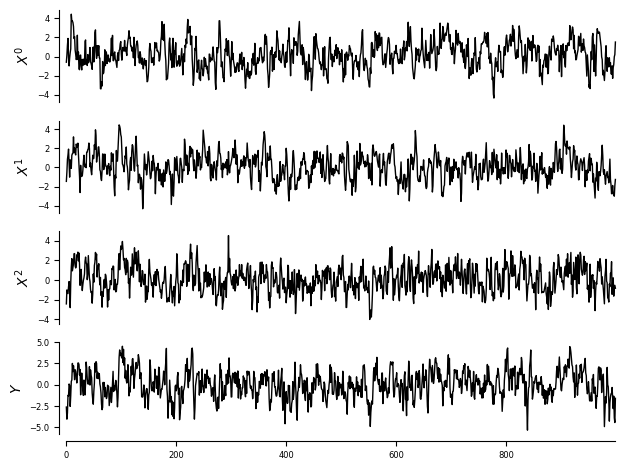

In [4]:
tp.plot_timeseries(dataframe); plt.show()

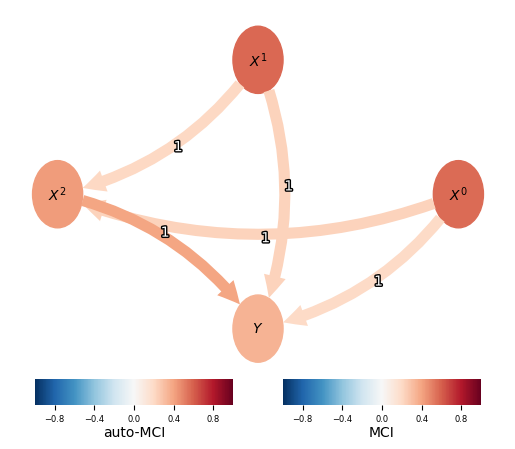

In [5]:
pcmci = PCMCI(dataframe=dataframe, 
              cond_ind_test=ParCorr())
results = pcmci.run_pcmci(tau_min=1, tau_max=2, pc_alpha=0.2, alpha_level=0.01)
tp.plot_graph(val_matrix=results['val_matrix'],
              graph=results['graph'], var_names=var_names,
              node_aspect=0.5, node_size=0.5
)
plt.show()

In [6]:
results['val_matrix']

array([[[ 0.        ,  0.56439763,  0.02220291],
        [ 0.        , -0.01399421,  0.03427737],
        [ 0.        ,  0.22810627, -0.01722652],
        [ 0.        ,  0.19784018,  0.01189324]],

       [[ 0.        , -0.0068683 , -0.00258229],
        [ 0.        ,  0.57696105, -0.0166335 ],
        [ 0.        ,  0.20570943, -0.00335112],
        [ 0.        ,  0.22964936, -0.02728422]],

       [[ 0.        ,  0.00522417, -0.00159409],
        [ 0.        , -0.06374713,  0.01907393],
        [ 0.        ,  0.42472901,  0.03335459],
        [ 0.        ,  0.39139594,  0.02574087]],

       [[ 0.        , -0.05105117, -0.02983719],
        [ 0.        ,  0.02107085,  0.02513089],
        [ 0.        ,  0.0305478 ,  0.01070271],
        [ 0.        ,  0.34447793,  0.03065018]]])

In [15]:
# save data to csv from ndarray, first create a dataframe, path is to the data folder under synthetic subfolder, create the folder if it does not exist
if not os.path.exists('../../data/synthetic'):
    os.makedirs('../../data/synthetic')

dataframe = pd.DataFrame(data, columns=var_names)
dataframe.to_csv(f'../../data/synthetic/causal_{N}cols_{T}rows.csv')
